In [762]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [764]:
# we will import this library to handle how the arabic characters display 
import arabic_reshaper 
# this function helps us in ordering the text as arabic lan is RTL
from bidi.algorithm import get_display

In [766]:
# for handling arabic text 
def arabic_text(text):
    # reshaping here means that the input text for ex: ة ب ط ر ق will be taken and reshap the characters to be قرطبة
    reshaped_text = arabic_reshaper.reshape(text)
    # and here it will deal with the direction of the displaying arabic text as RTL
    bidi_text = get_display(reshaped_text)
    return bidi_text

## Loading the data

In [769]:
df = pd.read_csv(r"C:\Users\almal\Desktop\Jadarat_data.csv")

### Viewing the dataframe

In [772]:
df

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


## 1. Data Profiling:

In [775]:
df.shape

(1470, 18)

In [777]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [779]:
df.describe()

,job_post_id
count,1.470000e+03
mean,2.020203e+13
std,5.863941e+04
min,2.020203e+13
25%,2.020203e+13
50%,2.020203e+13
75%,2.020203e+13
max,2.020203e+13


In [781]:
df.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

### Data Quality Checks

**Here are typical steps involved in checking data quality:**

#### 1. Reliability:

In [785]:
#It is turstworthy.

#### 2. Timeliness: 

In [788]:
#For our quistions its Timeliness.

#### 3. Consistency: 

In [791]:
# It's consistenc.

#### 4. Relevance: 


In [794]:
#1. Sample Appropriateness: it is a sample Appropriateness.

In [796]:
#2. Variable Selection: dropping the jop date column as its not related to the further analysis
df.drop(['job_date'] ,axis=1,inplace=True)

#### 5. Uniqueness: 


In [799]:
df[df.duplicated(keep=False)]

,job_title,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
866,موظف استقبال فندق,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق صفوة الغفران الفندقية,13-84812,خاص,متوسطة فئة ب,NaN,"['Language data', 'الانجليزية', 'متوسط']",مكة المكرمة,MAKKAH AL...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026375557,0 Years,M
867,أخصائي علاج طبيعي,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مركز رضوى للحجامة,14-1709089,خاص,صغيرة فئة أ,الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة ...,NaN,المدينة المنورة,YANBU AL ...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026375503,0 Years,both
868,أخصائي علاج طبيعي,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مركز سكاكا الجوف للحجامة,25-1952621,خاص,صغيرة فئة أ,مراكز الطب البديل والتكميلي,NaN,الجوف,SAKAKA...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026375465,0 Years,both
869,مدير إداري,['The Project Manager (PM) are the responsible...,['The Project Manager (PM) are the responsible...,شـركة سفاري مساهمه مقفله,1-4430,خاص,عملاقة,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Skill data', 'التخطيط الاستراتيجي', 'محترف',...",الرياض,AR RIYADH...,"['Salary', '8000.0', 'Benefits', 'الراتب من 80...",دوام كامل,0 / 1,20202026375235,4 Years,both
873,مشرف صيانة,['إعداد خطة وبرنامج العمل، ومتابعة إجراءات تحد...,[' متابعة إجراءات تحديد نوع وطبيعة الصيانة و...,مؤسسة عواطف عبدالله حسين قطان للمقاولات العامة,12-1876162,خاص,صغيرة فئة أ,أنشطة خدمات صيانة المباني,NaN,مكة المكرمة,AT TAIF...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026374934,0 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,عامل كاونتر مأكولات ومشروبات,['تحضير وتقديم الطعام والشراب في الأماكن العا...,[' تحضير المشروبات الساخنة والباردة للعملاء'...,مؤسسة قدور نجد لخدمات الاعاشة,1-2173101,خاص,متوسطة فئة ب,محلات الوجبات السريعة ( تشمل محلات البيتزاء ),NaN,الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 5,20202026373486,0 Years,both
1158,مندوب مشتريات,['شراء المواد والسلع عن طريق الشراء المباشر، و...,[' دراسة طلبات الشراء في الجهة المعنية وتدقي...,شركة بشار محمد قطامش للمقاولات شركة الشخص الواحد,1-228552,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026373225,0 Years,both
1383,مدير مقهى,['تخطيط عمليات المقهى أو ما يماثلها من الأماكن...,[' إدارة عملية تخطيط وتقديم الأطعمة والمشروب...,مؤسسة اسياف لتقديم المشروبات,12-1959550,خاص,صغيرة فئة أ,بيع الأغذية والمشروبات بالتجزئة في الأكشاك وال...,"['Skill data', 'الرسم على القهوة', 'محترف', 'L...",مكة المكرمة,AL HALQAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026376997,2 Years,both
1467,صيدلي,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [801]:
df = df.drop_duplicates()

In [803]:
df.shape

(1424, 17)

In [805]:
#Based on 'job_post_id' i drop any raw that duplicated

#### 6. Completeness: 

In [808]:
df.isnull().sum()

job_title         0
job_desc          0
job_tasks         0
comp_name         0
comp_no           0
comp_type         0
comp_size        14
eco_activity     83
qualif          667
region            0
city              0
benefits          0
contract          0
positions         0
job_post_id       0
exper             0
gender            0
dtype: int64

In [810]:
# Fill null values using imputation with constant values
df['comp_size'] = df['comp_size'].fillna("غير معروف")
df['eco_activity'] = df['eco_activity'].fillna("غير معروف")
df['qualif'] = df['qualif'].fillna("ليس محدد")

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3503285274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comp_size'] = df['comp_size'].fillna("غير معروف")
C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3503285274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eco_activity'] = df['eco_activity'].fillna("غير معروف")
C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3503285274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [812]:
df.isnull().sum()

job_title       0
job_desc        0
job_tasks       0
comp_name       0
comp_no         0
comp_type       0
comp_size       0
eco_activity    0
qualif          0
region          0
city            0
benefits        0
contract        0
positions       0
job_post_id     0
exper           0
gender          0
dtype: int64

#### 7. Check Accuracy:

**Appropriateness of data types**

In [816]:
df.dtypes 

job_title       object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [818]:
df

,job_title,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,ليس محدد,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,غير معروف,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,بائع,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,8-1977608,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,ليس محدد,المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026401107,2 Years,F
1465,مهندس تقنية معلومات,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,ليس محدد,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,غير معروف,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [820]:
# To use this column as an integer, I remove the "year" word using "split" and change the column name to be more understandable
df['exper'] = df['exper'].map(lambda x: int(x.split(' ')[0]))
df.rename(columns={'exper' : 'year of exper'} , inplace=True)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\1999914536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exper'] = df['exper'].map(lambda x: int(x.split(' ')[0]))
C:\Users\almal\AppData\Local\Temp\ipykernel_13244\1999914536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'exper' : 'year of exper'} , inplace=True)


In [822]:
#Take the second value after '/' to make the column integer
df['positions'] = df['positions'].map(lambda x: int(x.split('/')[1]))

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3502345406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positions'] = df['positions'].map(lambda x: int(x.split('/')[1]))


In [824]:
#Take the second value after '-' to make the column integer
df['comp_no'] = df['comp_no'].map(lambda x: int(x.split('-')[1]))

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\2415721235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comp_no'] = df['comp_no'].map(lambda x: int(x.split('-')[1]))


In [826]:
#Split the benefits column as it have list of values to two column one for salary and one for benefits
df[['salary' , 'benefits']] = df['benefits'].str.split('Benefits', expand=True)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\4275683663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['salary' , 'benefits']] = df['benefits'].str.split('Benefits', expand=True)


In [828]:
#Fill null value in benefits column after spliting it with constant value
df['benefits'] = df['benefits'].fillna("ليس هناك حوافز")

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\1281914890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['benefits'] = df['benefits'].fillna("ليس هناك حوافز")


In [830]:
#Clean salary column by replacing any type of symbols with space
df['salary'] = df['salary'].map(lambda x: x.split(',')[1])

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\1326308402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].map(lambda x: x.split(',')[1])


In [832]:
df['salary'] = df['salary'].str.replace(']', '', regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\2403602998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].str.replace(']', '', regex=False)


In [834]:
df['salary'] = df['salary'].str.replace("'", "", regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\361083900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].str.replace("'", "", regex=False)


In [836]:
#Change salary type to be float after claening it
df['salary'] = df['salary'].astype(float)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3552562623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].astype(float)


In [838]:
#Clean benefits column by replacing any type of symbols with space
df['benefits'] = df['benefits'].str.replace(']', '', regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3369544542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['benefits'] = df['benefits'].str.replace(']', '', regex=False)


In [840]:
df['benefits'] = df['benefits'].str.replace("'", "", regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\1948925445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['benefits'] = df['benefits'].str.replace("'", "", regex=False)


In [842]:
df['benefits'] = df['benefits'].str.replace(",", "", regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\936822120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['benefits'] = df['benefits'].str.replace(",", "", regex=False)


In [844]:
#Clean job_desc column by replacing any type of symbols with space
df['job_desc'] = df['job_desc'].str.replace("['", "", regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\436333686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_desc'] = df['job_desc'].str.replace("['", "", regex=False)


In [846]:
df['job_desc'] = df['job_desc'].str.replace("']", "", regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3015486446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_desc'] = df['job_desc'].str.replace("']", "", regex=False)


In [848]:
df['job_tasks'] = df['job_tasks'].str.replace("['", "", regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\4285823239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_tasks'] = df['job_tasks'].str.replace("['", "", regex=False)


In [850]:
df['job_tasks'] = df['job_tasks'].str.replace("']", "", regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\131982667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_tasks'] = df['job_tasks'].str.replace("']", "", regex=False)


In [852]:
df['city'] = df['city'].map(lambda x: x.split(' ')[1] if ' ' in x else x)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3751663586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['city'].map(lambda x: x.split(' ')[1] if ' ' in x else x)


In [854]:
df['city'] = df['city'].str.replace("...", "", regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3818776343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['city'].str.replace("...", "", regex=False)


In [856]:
df['city'] = df['city'].str.replace("'", "", regex=False)

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3500232881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['city'].str.replace("'", "", regex=False)


In [858]:
# I chose to let the 'qualif' column remain unchanged until it's needed with job_desc and job_tasks

In [860]:
df

,job_title,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,year of exper,gender,salary
0,محاسب,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,تدقيق المطالبات المالية والتأكد من اكتمال ش...,شركة مقر العالم للسفريات,317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,RIYADH,ليس هناك حوافز,دوام كامل,1,20202026350419,0,both,5000.0
1,بائع,بيع مجموعة من السلع والخدمات للعملاء، وتوفير ا...,"بيع مجموعة من السلع والخدمات للعملاء.', ' ...",شركة عالم الكهرباء للمقاولات,1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,ليس محدد,المنطقة الشرقية,DAMMAM,ليس هناك حوافز,دوام كامل,3,20202026350389,0,both,5000.0
2,أخصائي عمليات موارد بشرية,تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمراق...,تنفيذ الإجراءات والأنظمة والنماذج الخاصة بم...,شركه دار السلام,155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,THUMA,ليس هناك حوافز,دوام كامل,2,20202026350347,2,both,4000.0
3,ميكانيكي سيارات,تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج الص...,فحص أداء المعدّات الكهربائية والميكانيكية ل...,مؤسسة لمكو لغيار الزيوت,1925495,خاص,صغيرة فئة ب,غير معروف,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,HUFUF,ليس هناك حوافز,دوام كامل,10,20202026350219,0,M,5000.0
4,محاسب,إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإير...,تدقيق المطالبات المالية والتأكد من اكتمال ش...,مؤسسة فكرة اليمامة للمقاولات,2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,RIYADH,ليس هناك حوافز,دوام كامل,1,20202026350043,0,both,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,بائع,بيع مجموعة من السلع والخدمات للعملاء، وتوفير ا...,"بيع مجموعة من السلع والخدمات للعملاء.', ' ...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,1977608,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,ليس محدد,المنطقة الشرقية,HUFUF,ليس هناك حوافز,دوام كامل,1,20202026401107,2,F,4000.0
1465,مهندس تقنية معلومات,دراسة احتياجات العميل من الأجهزة الحاسوبية وبر...,متابعة وتقييم عملية جمع وتحليل المعطيات وتط...,مطعم الاوراق الخضر لتقديم الوجبات,1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,ليس محدد,الرياض,RIYADH,ليس هناك حوافز,دوام كامل,1,20202026400353,0,both,5500.0
1466,سكرتير,دعم المدير أو الإدارة من خلال كتابة الوثائق وإ...,تدوين الملاحظات، التي يتم إملاؤها، بطريقة ا...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH,ليس هناك حوافز,دوام كامل,1,20202026399849,2,both,4000.0
1467,صيدلي,دراسة التركيبات الدوائية للعقاقير والعلاجات وت...,دراسة مواصفات وتركيبات الادوية والعقاقير وا...,شركة تقنية الدواجن والألبان للتجارة,2415250,خاص,صغيرة فئة ب,غير معروف,"['Professional certificate \\ License data', '...",الرياض,RIYADH,ليس هناك حوافز,دوام كامل,1,20202026399061,0,both,7000.0


**Dealing with outliers:**

## 3. Univariate Analysis: 

### 1. Univariate Graphical Analysis:

In [865]:
#Analysis gender column
gender = df['gender'].value_counts()
gender

gender
both    569
M       463
F       392
Name: count, dtype: int64

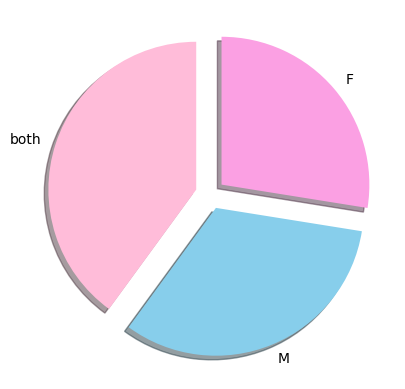

In [867]:
plt.pie(x=gender.values,
        labels=gender.index,
        startangle=90,
        shadow=True,
        explode = [0.1,0.1 , 0.1],
        colors = ['#ffbcd9','#87ceeb','#fba0e3']
       )
plt.savefig('women.png')
plt.show()

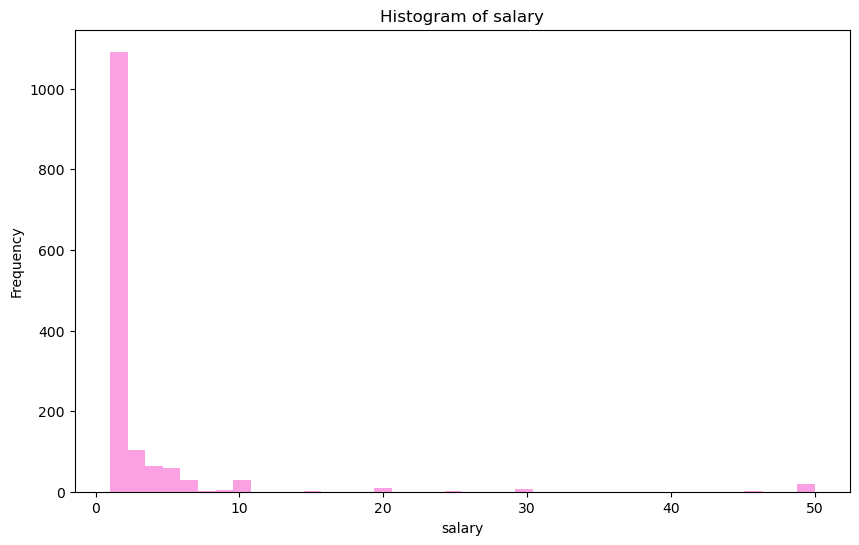

In [869]:
#To see the salary frequency - before cutting-
plt.figure(figsize=(10, 6))
plt.hist(df['positions'],
         bins = 40,
         color = '#fba0e3'
         )
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.title(f'Histogram of salary')
plt.show()

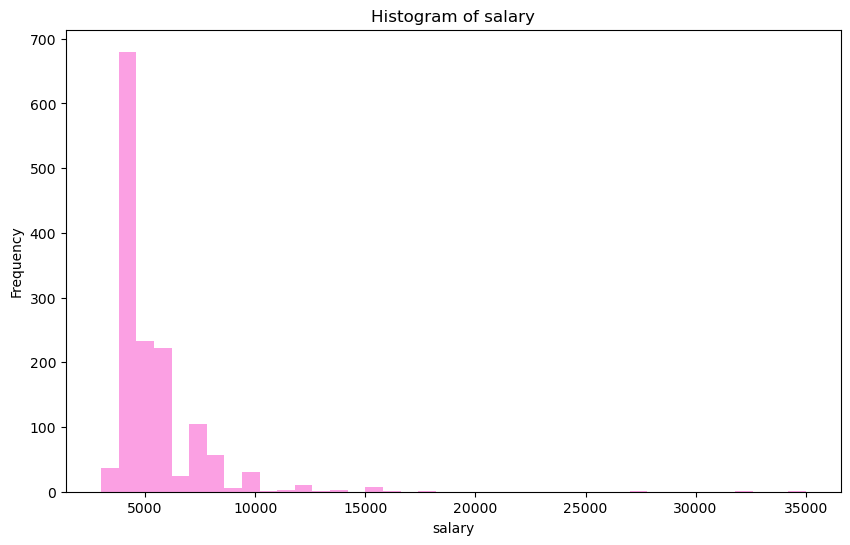

In [879]:
#To see the salary frequency - before cutting-
plt.figure(figsize=(10, 6))
plt.hist(df['salary'],
         bins = 40,
         color = '#fba0e3'
         )
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.title(f'Histogram of salary')
plt.show()

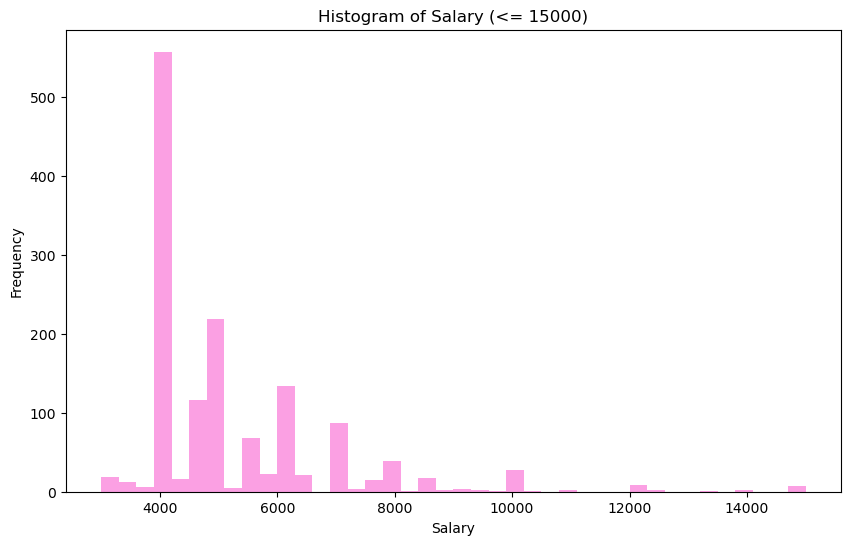

In [881]:
#To see the salary frequency - after cutting- we can se that most salary around 4000
filtered_salaries = df[df['salary'] <= 15000]['salary']

plt.figure(figsize=(10, 6))
plt.hist(filtered_salaries, bins=40, color='#fba0e3')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary (<= 15000)')
plt.show()

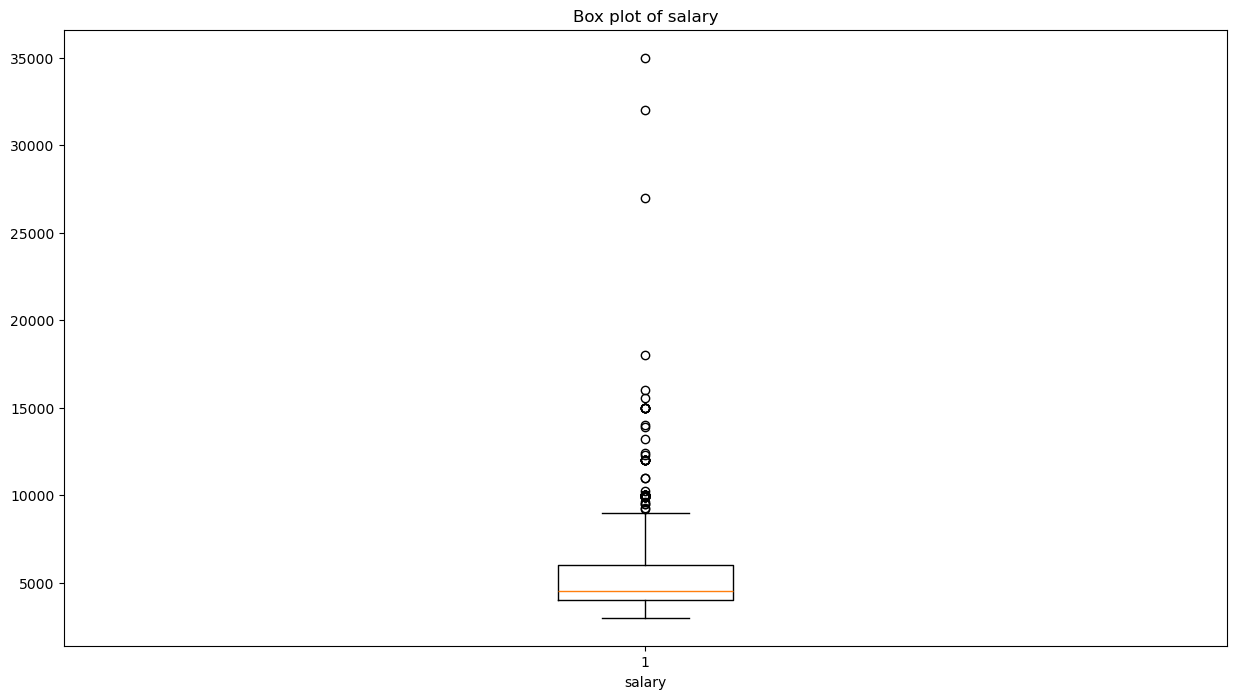

In [883]:
#Box plot before cutting
plt.figure(figsize=(15,8))
plt.boxplot(df['salary'])
plt.xlabel('salary')

plt.title(f'Box plot of salary')
plt.show()

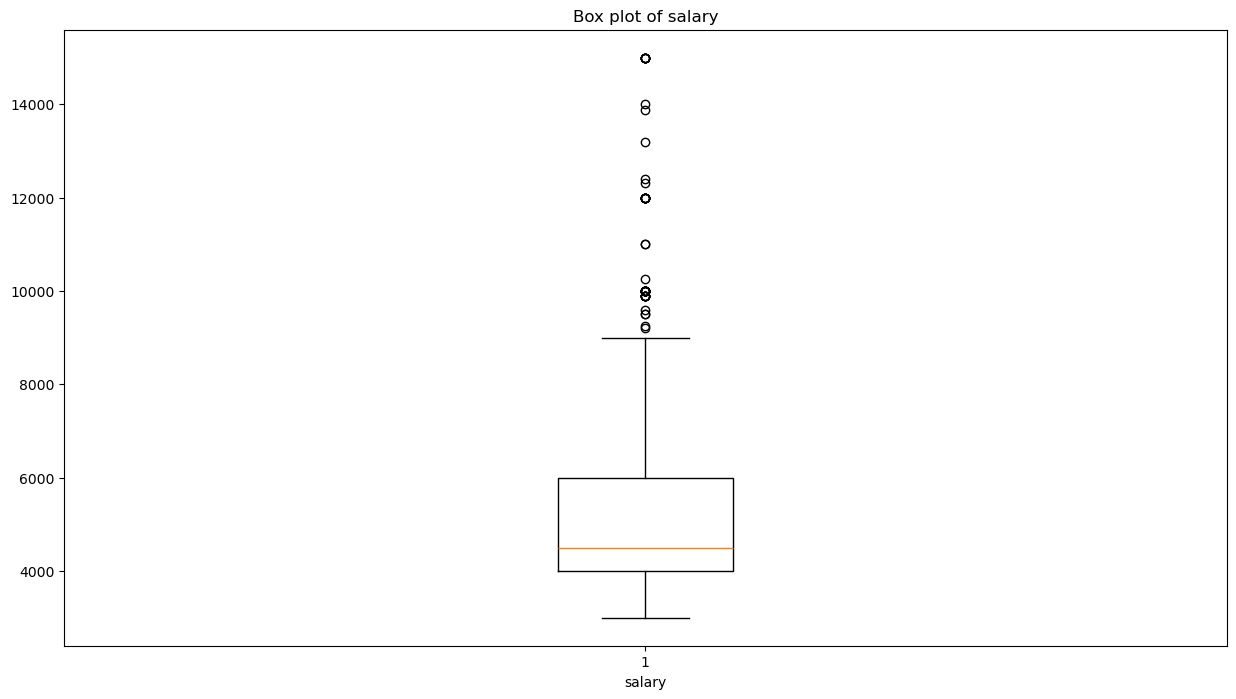

In [885]:
#Box plot after cutting
plt.figure(figsize=(15,8))
plt.boxplot(filtered_salaries)
plt.xlabel('salary')

plt.title(f'Box plot of salary')
plt.show()

### 2. Univariate Non-Graphical analysis: 

In [888]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
comp_no,1424.0,1.446260e+06,873256.587736,1.180000e+02,3.300530e+05,1.947132e+06,2.042663e+06,2.665720e+06
positions,1424.0,2.949438e+00,6.375482,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
job_post_id,1424.0,2.020203e+13,58951.642979,2.020203e+13,2.020203e+13,2.020203e+13,2.020203e+13,2.020203e+13
year of exper,1424.0,1.277388e+00,1.871755,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.200000e+01
salary,1424.0,5.285712e+03,2175.044157,3.000000e+03,4.000000e+03,4.500000e+03,6.000000e+03,3.500000e+04


In [890]:
print(df['salary'].mean())
print(df['salary'].std())

5285.712078651685
2175.044157022577


## 4. Bivariate/Multivariate Analysis:

<Axes: >

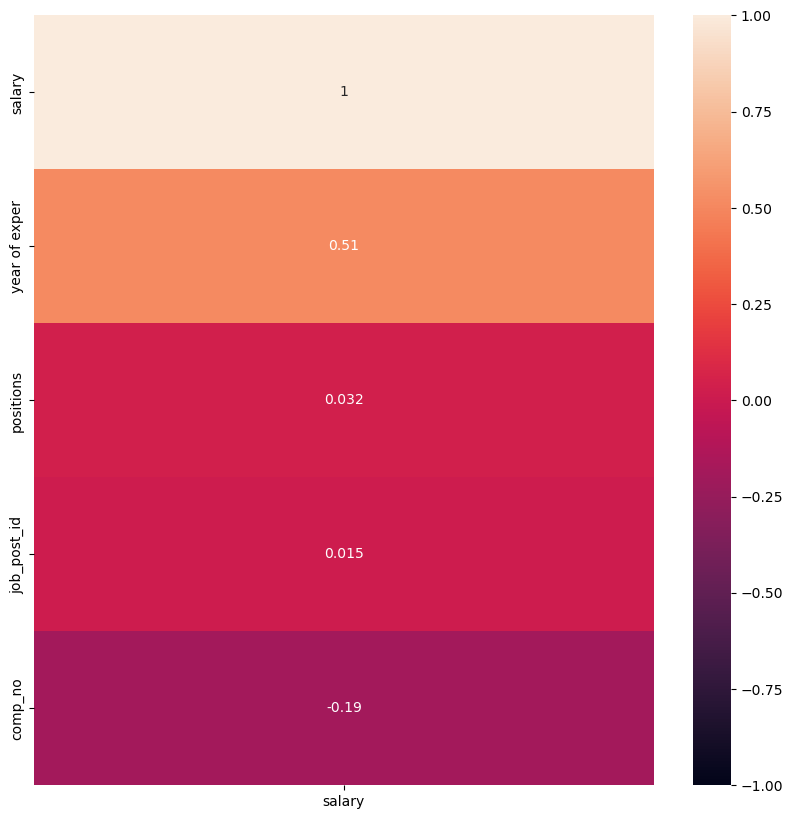

In [893]:
#Single-Target Correlation Heatmap between salary and all numeric features.
numeric =  df.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(numeric.corr()[['salary']].sort_values('salary', ascending = False),
vmin = -1, vmax = +1, annot = True, ax = ax)

In [895]:
#Correlation Matrix
corr_matrix = df.select_dtypes(include=np.number).corr()
corr_matrix

,comp_no,positions,job_post_id,year of exper,salary
comp_no,1.000000,0.015463,0.105885,-0.096295,-0.188534
positions,0.015463,1.000000,-0.071060,-0.062718,0.031598
job_post_id,0.105885,-0.071060,1.000000,0.007155,0.014725
year of exper,-0.096295,-0.062718,0.007155,1.000000,0.507827
salary,-0.188534,0.031598,0.014725,0.507827,1.000000


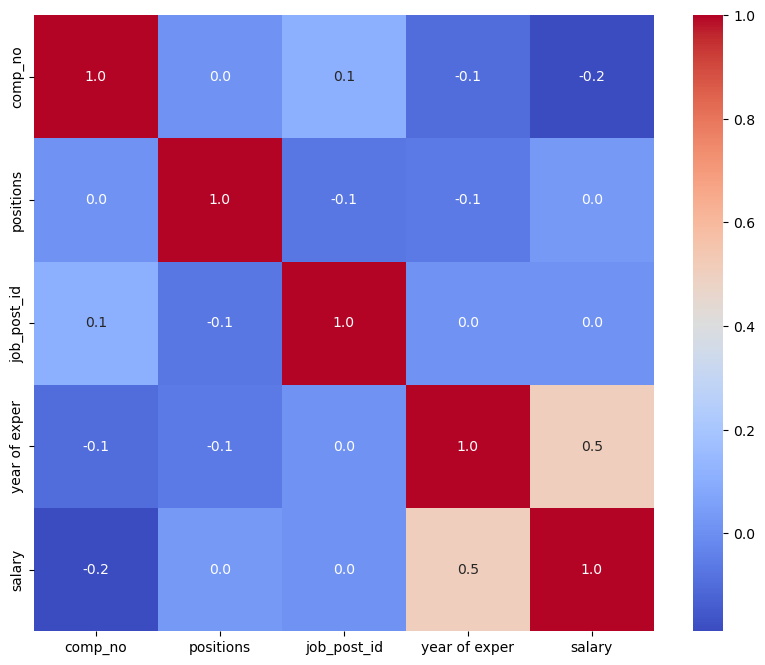

In [897]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

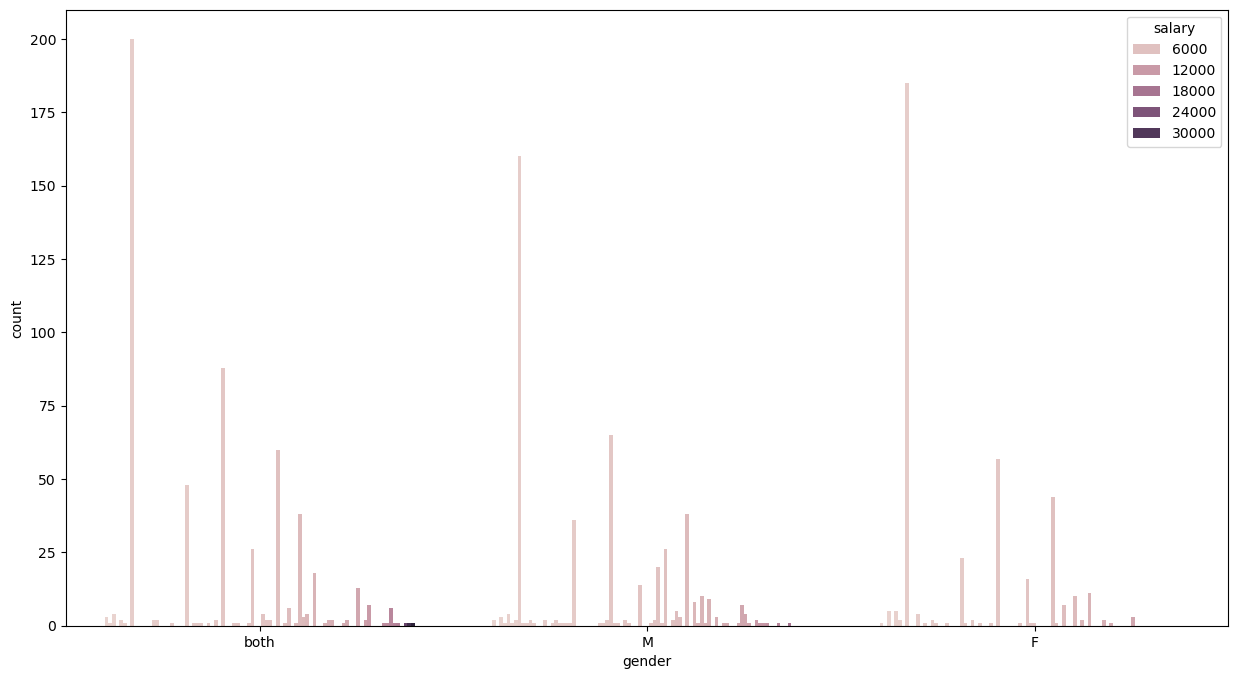

In [899]:
#Before cutting
plt.figure(figsize=(15,8))
sns.countplot(x = 'gender', hue = 'salary', data = df);

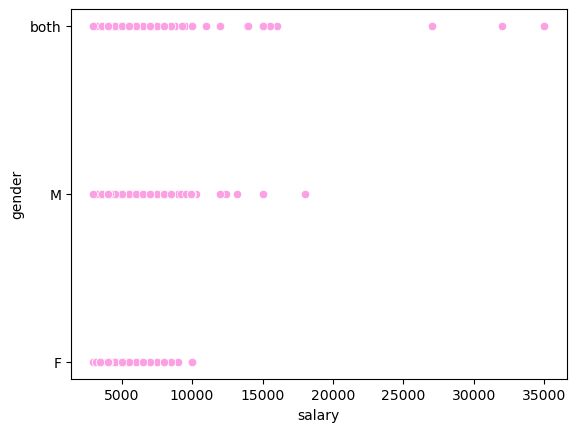

In [900]:
#Show the relationship between gender and salary
sns.scatterplot(y='gender', x='salary',
                color='#fba0e3',
                data=df)



# Show the plot
plt.show()

<Axes: ylabel='salary'>

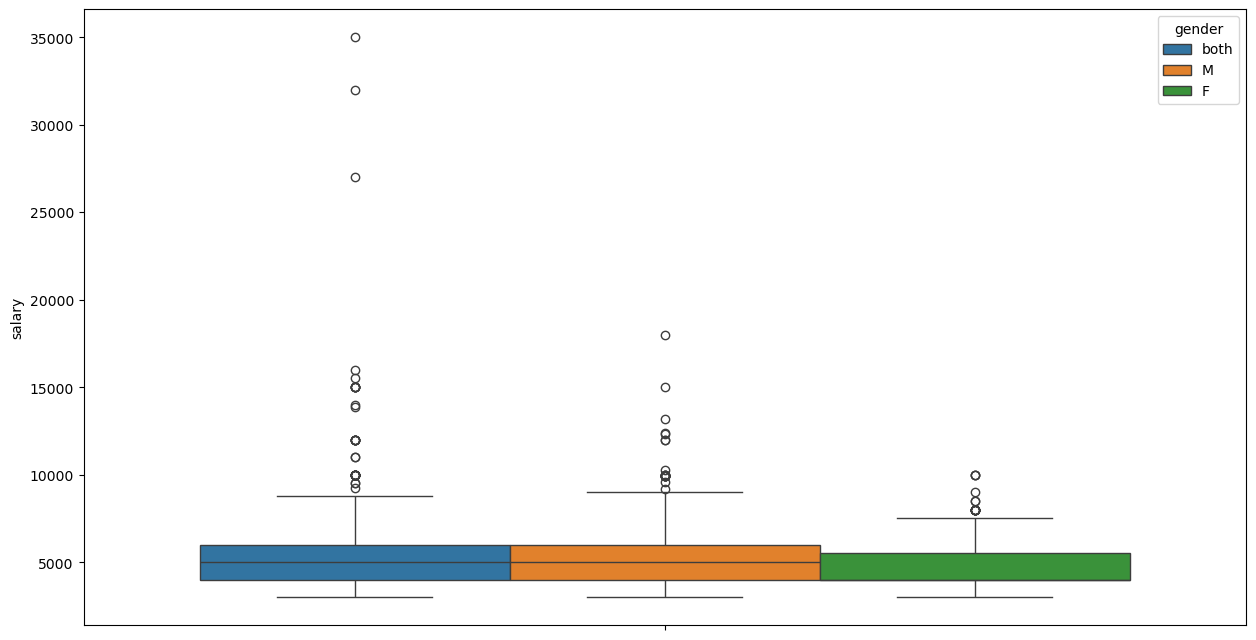

In [903]:
plt.figure(figsize=(15,8))

sns.boxplot(
    df,
    y='salary',
    hue="gender")

**numerical & numerical --> (Scatter plot, line chart)**

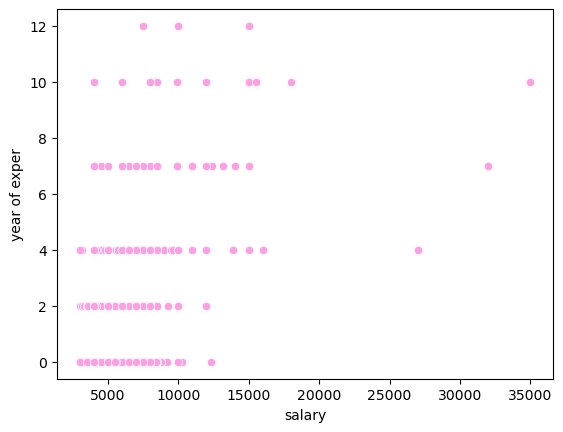

In [906]:
#Show the relationship between year of exper and salary
sns.scatterplot(y='year of exper', x='salary',
                color ='#fba0e3',
                data=df)

# Show the plot
plt.show()

#### Q1: What proportion of job postings is attributed to each region within the kingdom?

In [909]:
df[['region','positions']]

,region,positions
0,الرياض,1
1,المنطقة الشرقية,3
2,الرياض,2
3,المنطقة الشرقية,10
4,الرياض,1
...,...,...
1464,المنطقة الشرقية,1
1465,الرياض,1
1466,مكة المكرمة,1
1467,الرياض,1


In [911]:
df['region'] =  df['region'].apply(arabic_text)
region_positions = df.groupby('region')['positions'].sum()
region_positions.index.name = 'region'
region_positions

C:\Users\almal\AppData\Local\Temp\ipykernel_13244\3681053625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] =  df['region'].apply(arabic_text)


region
ﺓﺭﻮﻨﻤﻟﺍ ﺔﻨﻳﺪﻤﻟﺍ     139
ﺔﺣﺎﺒﻟﺍ               74
ﺔﻣﺮﻜﻤﻟﺍ ﺔﻜﻣ        1188
ﺔﻴﻗﺮﺸﻟﺍ ﺔﻘﻄﻨﻤﻟﺍ     486
ﺔﻴﻟﺎﻤﺸﻟﺍ ﺩﻭﺪﺤﻟﺍ      11
ﺮﻴﺴﻋ                111
ﺽﺎﻳﺮﻟﺍ             1890
ﻑﻮﺠﻟﺍ                 6
ﻙﻮﺒﺗ                 15
ﻞﺋﺎﺣ                 80
ﻢﻴﺼﻘﻟﺍ              119
ﻥﺍﺮﺠﻧ                65
ﻥﺍﺯﺎﺟ                13
ﻯﺮﺧﺍ                  3
Name: positions, dtype: int64

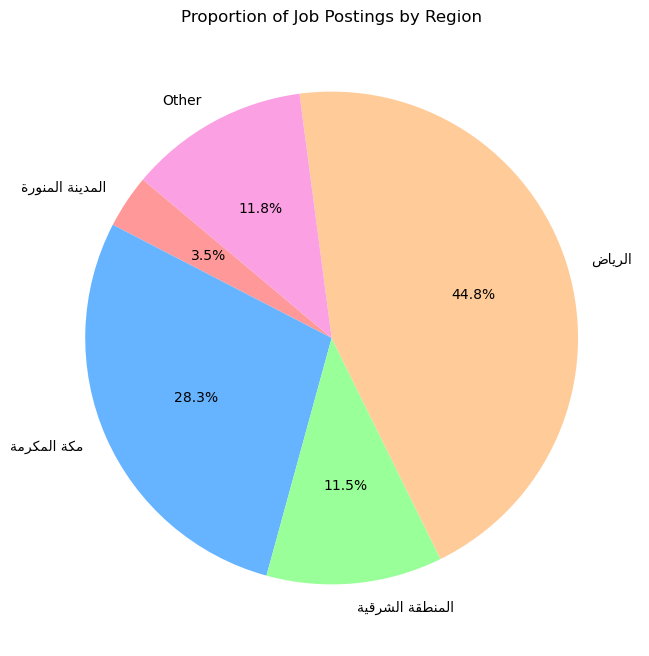

In [917]:
#Calculate proportions
region_proportion = region_positions / region_positions.sum()

#Regions that are less than 3% will replace it with 'Other' to be readable
threshold = 0.03
small_regions = region_proportion[region_proportion < threshold]
other_total = small_regions.sum()

plt.figure(figsize=(8, 8))
plt.pie(region_updated,
        labels=region_updated.index, 
        autopct='%1.1f%%',
        startangle=140 , 
        colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fba0e3','#ffb3e6','#fba0e3'])
 #'#80ffff'
plt.title('Proportion of Job Postings by Region')
plt.savefig('riy.png')
plt.show()

#### AnswerQ1: We can observe that the Riyadh region had the most job postings, accounting for 44.8% of the total.


#### Q2:Is there a gender preference indicated in the job postings?

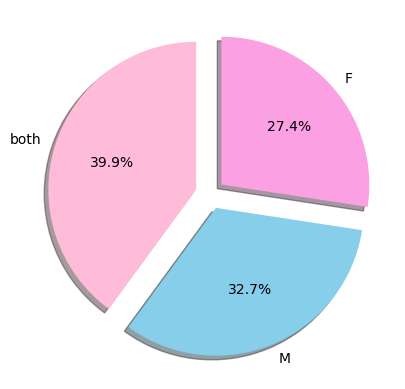

In [548]:
plt.pie(x=gender.values,
        labels=gender.index,
        startangle=90,
        shadow=True,
        explode = [0.1,0.1 , 0.1],
        colors = ['#ffbcd9','#87ceeb','#fba0e3'],
        autopct='%1.1f%%'
       )
plt.savefig('women.png')
plt.show()

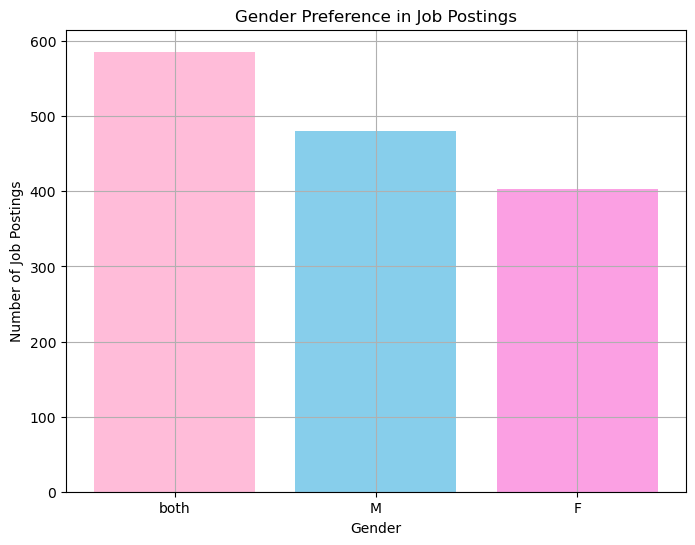

In [559]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, 
        gender_counts.values, 
        color = ['#ffbcd9','#87ceeb','#fba0e3']) 
plt.xlabel('Gender')
plt.ylabel('Number of Job Postings')
plt.title('Gender Preference in Job Postings')
plt.grid(True)
plt.show()

#### AnswerQ2: While males may seem to get more preference, the fact that 'both' is the top category makes it difficult to be certain.


#### Q3: What is the expected salary range for fresh graduates?

In [582]:
fresh_graduate = salary_df[salary_df['year of exper'] == 0]
fresh_graduate

,year of exper,salary
0,0,5000.0
1,0,5000.0
3,0,5000.0
4,0,5000.0
5,0,4500.0
...,...,...
1463,0,4000.0
1465,0,5500.0
1467,0,7000.0
1468,0,4000.0


In [584]:
fresh_graduate['salary'].mean()

4712.236494597839

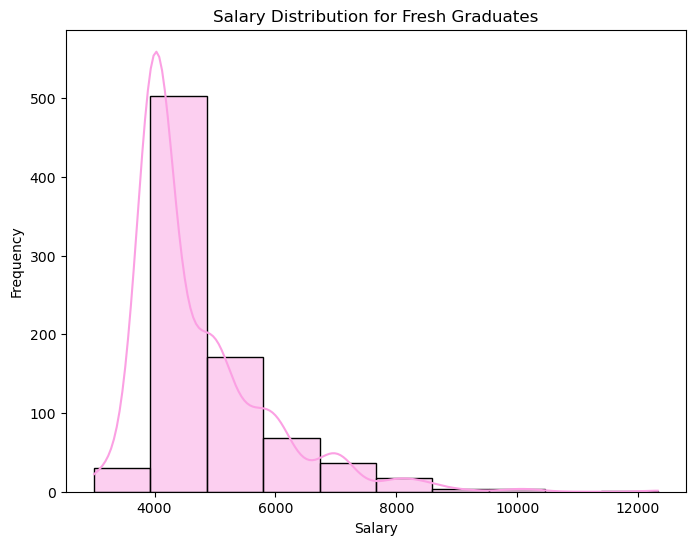

In [623]:
plt.figure(figsize=(8, 6))
sns.histplot(fresh_graduate['salary'], bins=10, kde=True, color='#fba0e3')
plt.title('Salary Distribution for Fresh Graduates')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

#### Answer Q3: The average salary is approximately 4,712.24.


#### Q4: Are job opportunities predominantly targeted at individuals with experience, or  is there room for fresh graduates as well?

In [589]:
experienced = df[df['year of exper'] > 0]

fresh_graduate_count = len(fresh_graduate)
experienced_count = len(experienced)

total_jobs = fresh_graduate_count + experienced_count
fresh_graduate_proportion = fresh_graduate_count / total_jobs
experienced_proportion = experienced_count / total_jobs

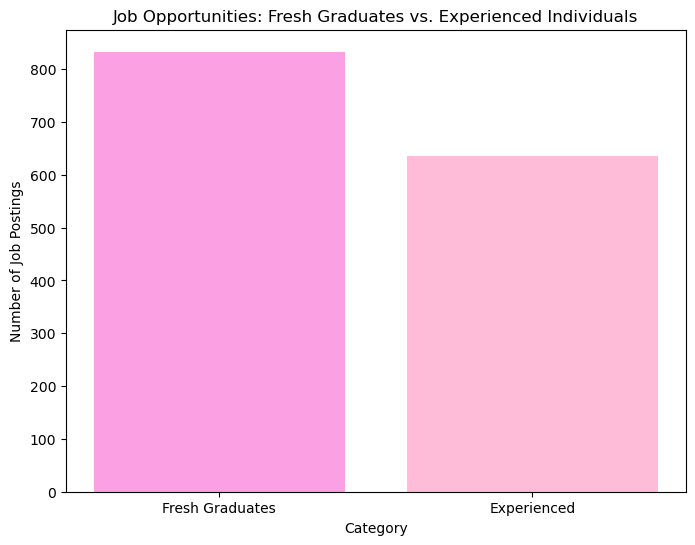

In [591]:
labels = ['Fresh Graduates', 'Experienced']
counts = [fresh_graduate_count, experienced_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['#fba0e3', '#ffbcd9'])
plt.title('Job Opportunities: Fresh Graduates vs. Experienced Individuals')
plt.xlabel('Category')
plt.ylabel('Number of Job Postings')
plt.savefig('job.png')
plt.show()

#### AnswerQ4: The bar show that there is room for fresh graduates.

#### Q5: Which are the top 5 most posted jobs?

In [611]:
df['job_title'] =  df['job_title'].apply(arabic_text)

In [613]:
most_requir_jop = df['job_title'].value_counts().sort_values(ascending=False)
most_requir_jop

job_title
ﻊﺋﺎﺑ                   98
ﺐﺳﺎﺤﻣ                  89
ﻖﻳﻮﺴﺗ ﻲﺋﺎﺼﺧﺃ           54
ﻱﺭﺍﺩﺇ ﺪﻋﺎﺴﻣ            45
ﻝﺎﺒﻘﺘﺳﺍ ﻒﻇﻮﻣ           45
                       ..
ﺔﻴﺒﻃ ﺓﺰﻬﺟﺃ ﻲﻨﻓ          1
ﻲﻧﺎﺒﻣ ﺔﻧﺎﻴﺻ ﻲﻨﻓ         1
ﺮﺷﺎﺒﻣ ﻊﺋﺎﺑ              1
ﺝﺎﺘﻧﺇ ﺱﺪﻨﻬﻣ             1
ﻡﺎﺧﺭ ﺐﻴﻄﺸﺗ ﺔﻟﺁ ﻞﻐﺸﻣ     1
Name: count, Length: 324, dtype: int64

In [615]:
top_ten_most_requir_jop = most_requir_jop.head(5)
top_ten_most_requir_jop 

job_title
ﻊﺋﺎﺑ            98
ﺐﺳﺎﺤﻣ           89
ﻖﻳﻮﺴﺗ ﻲﺋﺎﺼﺧﺃ    54
ﻱﺭﺍﺩﺇ ﺪﻋﺎﺴﻣ     45
ﻝﺎﺒﻘﺘﺳﺍ ﻒﻇﻮﻣ    45
Name: count, dtype: int64

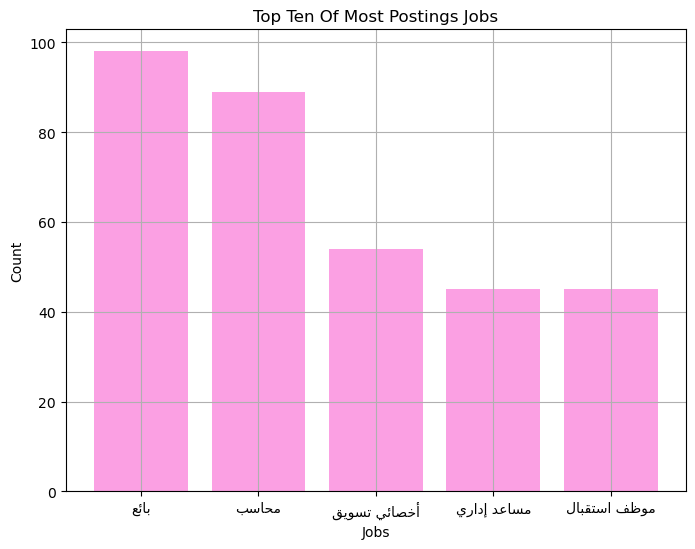

In [631]:
plt.figure(figsize=(8, 6))
plt.bar(top_ten_most_requir_jop.index, top_ten_most_requir_jop.values ,color='#fba0e3')
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.title('Top Ten Of Most Postings Jobs')
plt.grid(True)
plt.show()

In [625]:
#Riyadh avrage salary for fresh graduate
salary_df = df[['year of exper' , 'salary']]
RIYADH = df[(df['year of exper'] == 0) & (df['city'] == 'RIYADH')]
RIYADH['salary'].mean()

4859.059649122807

In [629]:
#Riyadh avrage salary for fresh experienced
experienced_jobs['salary'].mean()

6056.268445839874